In [20]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os, sys 
sys.path.append('..')
import collections
import copy
import itertools
import aoc_utils as au
import math 
import matplotlib.pyplot as plt
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
input_text = au.read_txt_file_lines('input.txt')
n_rows = len(input_text)
print(n_rows)

680


In [61]:
instruction = collections.namedtuple('instruction', 'direction distance colour')
list_instructions = []
for line in input_text: 
    line_split = line.split() 
    direction = line_split[0]
    distance = int(line_split[1])
    colour = line_split[2].rstrip(')').lstrip('(')
    list_instructions.append(instruction(direction, distance, colour))
# print(input_text[:5])
# print(list_instructions[:5])
list_instructions[:5]

[instruction(direction='R', distance=6, colour='#3a8da2'),
 instruction(direction='U', distance=3, colour='#2f9f73'),
 instruction(direction='L', distance=3, colour='#1fe640'),
 instruction(direction='U', distance=3, colour='#450603'),
 instruction(direction='L', distance=6, colour='#42b340')]

In [143]:
## first get the bounds of the grid
def traverse_grid(list_instructions, x_min=0, x_max=0, y_min=0, y_max=0):
    x = 0
    y = 0
    if x_min == 0 and x_max == 0 and y_min == 0 and y_max == 0:
        create_map = False
        find_min_max = True
        new_map = None 
    else:
        x_total = x_max - x_min + 3
        y_total = y_max - y_min + 3
        new_map = np.zeros((x_total, y_total), dtype=int)
        create_map = True
        find_min_max = False

    for l in list_instructions:
        direction = l.direction
        distance = l.distance
        assert direction in ['R', 'L', 'U', 'D'], 'direction not recognised'
        
        if find_min_max:
            if direction == 'R':
                x += distance
            elif direction == 'L':
                x -= distance
            elif direction == 'U':
                y += distance
            elif direction == 'D':
                y -= distance

            x_min = min(x_min, x)
            x_max = max(x_max, x)
            y_min = min(y_min, y)
            y_max = max(y_max, y)
        
        if create_map:
            x_relative = x - x_min + 1
            y_relative = y - y_min + 1
            distance_corr = distance
            # print(x_relative, y_relative, distance)
            if direction == 'R':
                new_map[x_relative:x_relative + distance_corr + 1, y_relative] = 1
                x += distance
            elif direction == 'L':
                new_map[x_relative - distance_corr:x_relative, y_relative] = 1
                x -= distance
            elif direction == 'U':
                new_map[x_relative, y_relative:y_relative + distance_corr + 1] = 1
                y += distance
            elif direction == 'D':
                new_map[x_relative, y_relative - distance_corr:y_relative] = 1
                y -= distance
    return (x_min, x_max, y_min, y_max), new_map

(x_min, x_max, y_min, y_max), _ = traverse_grid(list_instructions)
# print(x_min, x_max, y_min, y_max)
_, new_map = traverse_grid(list_instructions, x_min, x_max, y_min, y_max)

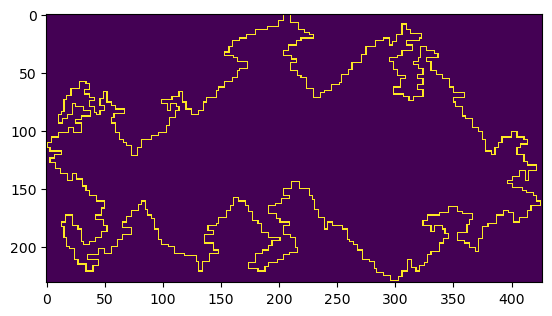

In [144]:
plt.imshow(new_map, interpolation='none')

In [151]:


def check_if_dot_inside(new_map, row, col):
    '''see if dot is next to a X or a vector pointing to it.'''
    if row < 0 or row >= new_map.shape[0] or col < 0 or col >= new_map.shape[1]:
        return False
    if new_map[row][col] == 0:
        new_map[row][col] = 1
        return True
    else:
        return False

def mark_dots_inside(new_map, row, col):
    '''Check if dot should be marked X. If so, check all its neighbours recursively.'''
    found_X = check_if_dot_inside(new_map, row, col)
    if found_X:
        mark_dots_inside(new_map, row, col - 1)
        mark_dots_inside(new_map, row, col + 1)
        mark_dots_inside(new_map, row - 1, col)
        mark_dots_inside(new_map, row + 1, col)
    return None

# mark_dots_inside(new_map[:50], 5, 200)  # should be correct but too many recursive calls  

def mark_dots_inside_iterative(new_map, row, col):
    '''Check if dot should be marked X. If so, check all its neighbours recursively.'''
    stack = [(row, col)]
    while stack:
        row, col = stack.pop()
        found_X = check_if_dot_inside(new_map, row, col)
        if found_X:
            stack.append((row, col - 1))
            stack.append((row, col + 1))
            stack.append((row - 1, col))
            stack.append((row + 1, col))
    return None

mark_dots_inside_iterative(new_map, 50, 200)  # should be correct but too many recursive calls

50465

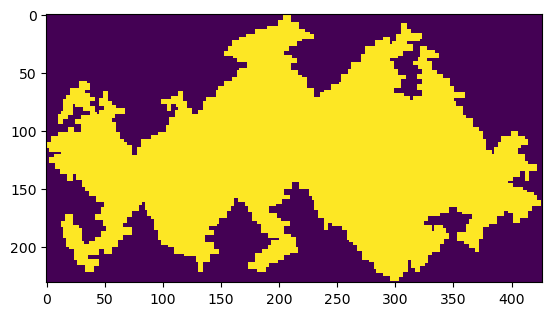

In [154]:
plt.imshow(new_map, interpolation='none')
new_map.sum()

## part 2 

In [157]:
list_instructions_part2 = [] 
for l in list_instructions:
    colour = l.colour 
    # print(colour)
    dir_int = colour[-1]
    if dir_int == '0':
        direction = 'R'
    elif dir_int == '1':
        direction = 'D'
    elif dir_int == '2':
        direction = 'L'
    elif dir_int == '3':
        direction = 'U'
    else:
        print('error')

    distance_hex = colour[1:-1]
    distance = int(distance_hex, 16)
    # print(distance_hex, distance)
    list_instructions_part2.append(instruction(direction, distance, None))

assert len(list_instructions) == len(list_instructions_part2)
list_instructions_part2[:5]

[instruction(direction='L', distance=239834, colour=None),
 instruction(direction='U', distance=195063, colour=None),
 instruction(direction='R', distance=130660, colour=None),
 instruction(direction='U', distance=282720, colour=None),
 instruction(direction='R', distance=273204, colour=None)]

In [160]:
(x_min, x_max, y_min, y_max), _ = traverse_grid(list_instructions_part2)
x_total = x_max - x_min + 3
y_total = y_max - y_min + 3 
## +3 so it's with an empty edge around the grid
print(f'x_total: {x_total}, y_total: {y_total}, x_min: {x_min}, y_min: {y_min}, x_max: {x_max}, y_max: {y_max}')

x_total: 11194347, y_total: 13849654, x_min: -1102625, y_min: -4737967, x_max: 10091719, y_max: 9111684
